# **HOUSE** **PRICE** **PREDICTION**

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/data (2).csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [2]:
df.shape

(4600, 18)

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [8]:
df['date'].value_counts()

2014-06-23 00:00:00    142
2014-06-25 00:00:00    131
2014-06-26 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-06-07 00:00:00      4
2014-07-06 00:00:00      3
2014-07-04 00:00:00      2
2014-05-11 00:00:00      2
2014-05-17 00:00:00      1
Name: date, Length: 70, dtype: int64

In [9]:
df['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [10]:
df['country'].value_counts()

USA    4600
Name: country, dtype: int64

## Exploratory data analysis

In [11]:
df=df.drop(['date','country','street','view','waterfront'],axis=1)

In [12]:
df['statezip']=df['statezip'].str.replace('WA','')
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005,Shoreline,98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,5,3370,280,1921,0,Seattle,98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0,Kent,98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0,Bellevue,98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992,Redmond,98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,4,1510,0,1954,1979,Seattle,98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,3,1460,0,1983,2009,Bellevue,98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,3,3010,0,2009,0,Renton,98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,3,1070,1020,1974,0,Seattle,98178


In [13]:
px.bar(
    x=df.bedrooms.value_counts().index,
    y=df.bedrooms.value_counts().values,
    labels={"x": "Number of Bedrooms", "y": "Number of Houses"},
    title="Number of Bedrooms with Number of Houses",
    color=df.bedrooms.value_counts().index
)

In [14]:
px.bar(
    x=df.bathrooms.value_counts().index,
    y=df.bathrooms.value_counts().values,
    labels={"x": "Number of Bathrooms", "y": "Number of Houses"},
    title="Number of Bathrooms with Number of Houses",
    color=df.bathrooms.value_counts().index
)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1901'),
  Text(2, 0, '1902'),
  Text(3, 0, '1903'),
  Text(4, 0, '1904'),
  Text(5, 0, '1905'),
  Text(6, 0, '1906'),
  Text(7, 0, '1907'),
  Text(8, 0, '1908'),
  Text(9, 0, '1909'),
  Text(10, 0, '1910'),
  Text(11, 0, '1911'),
  Text(12, 0, '1912'),
  Text(13, 0, '1913'),
  Text(14, 0, '1914'),
  Text(15, 0, '1

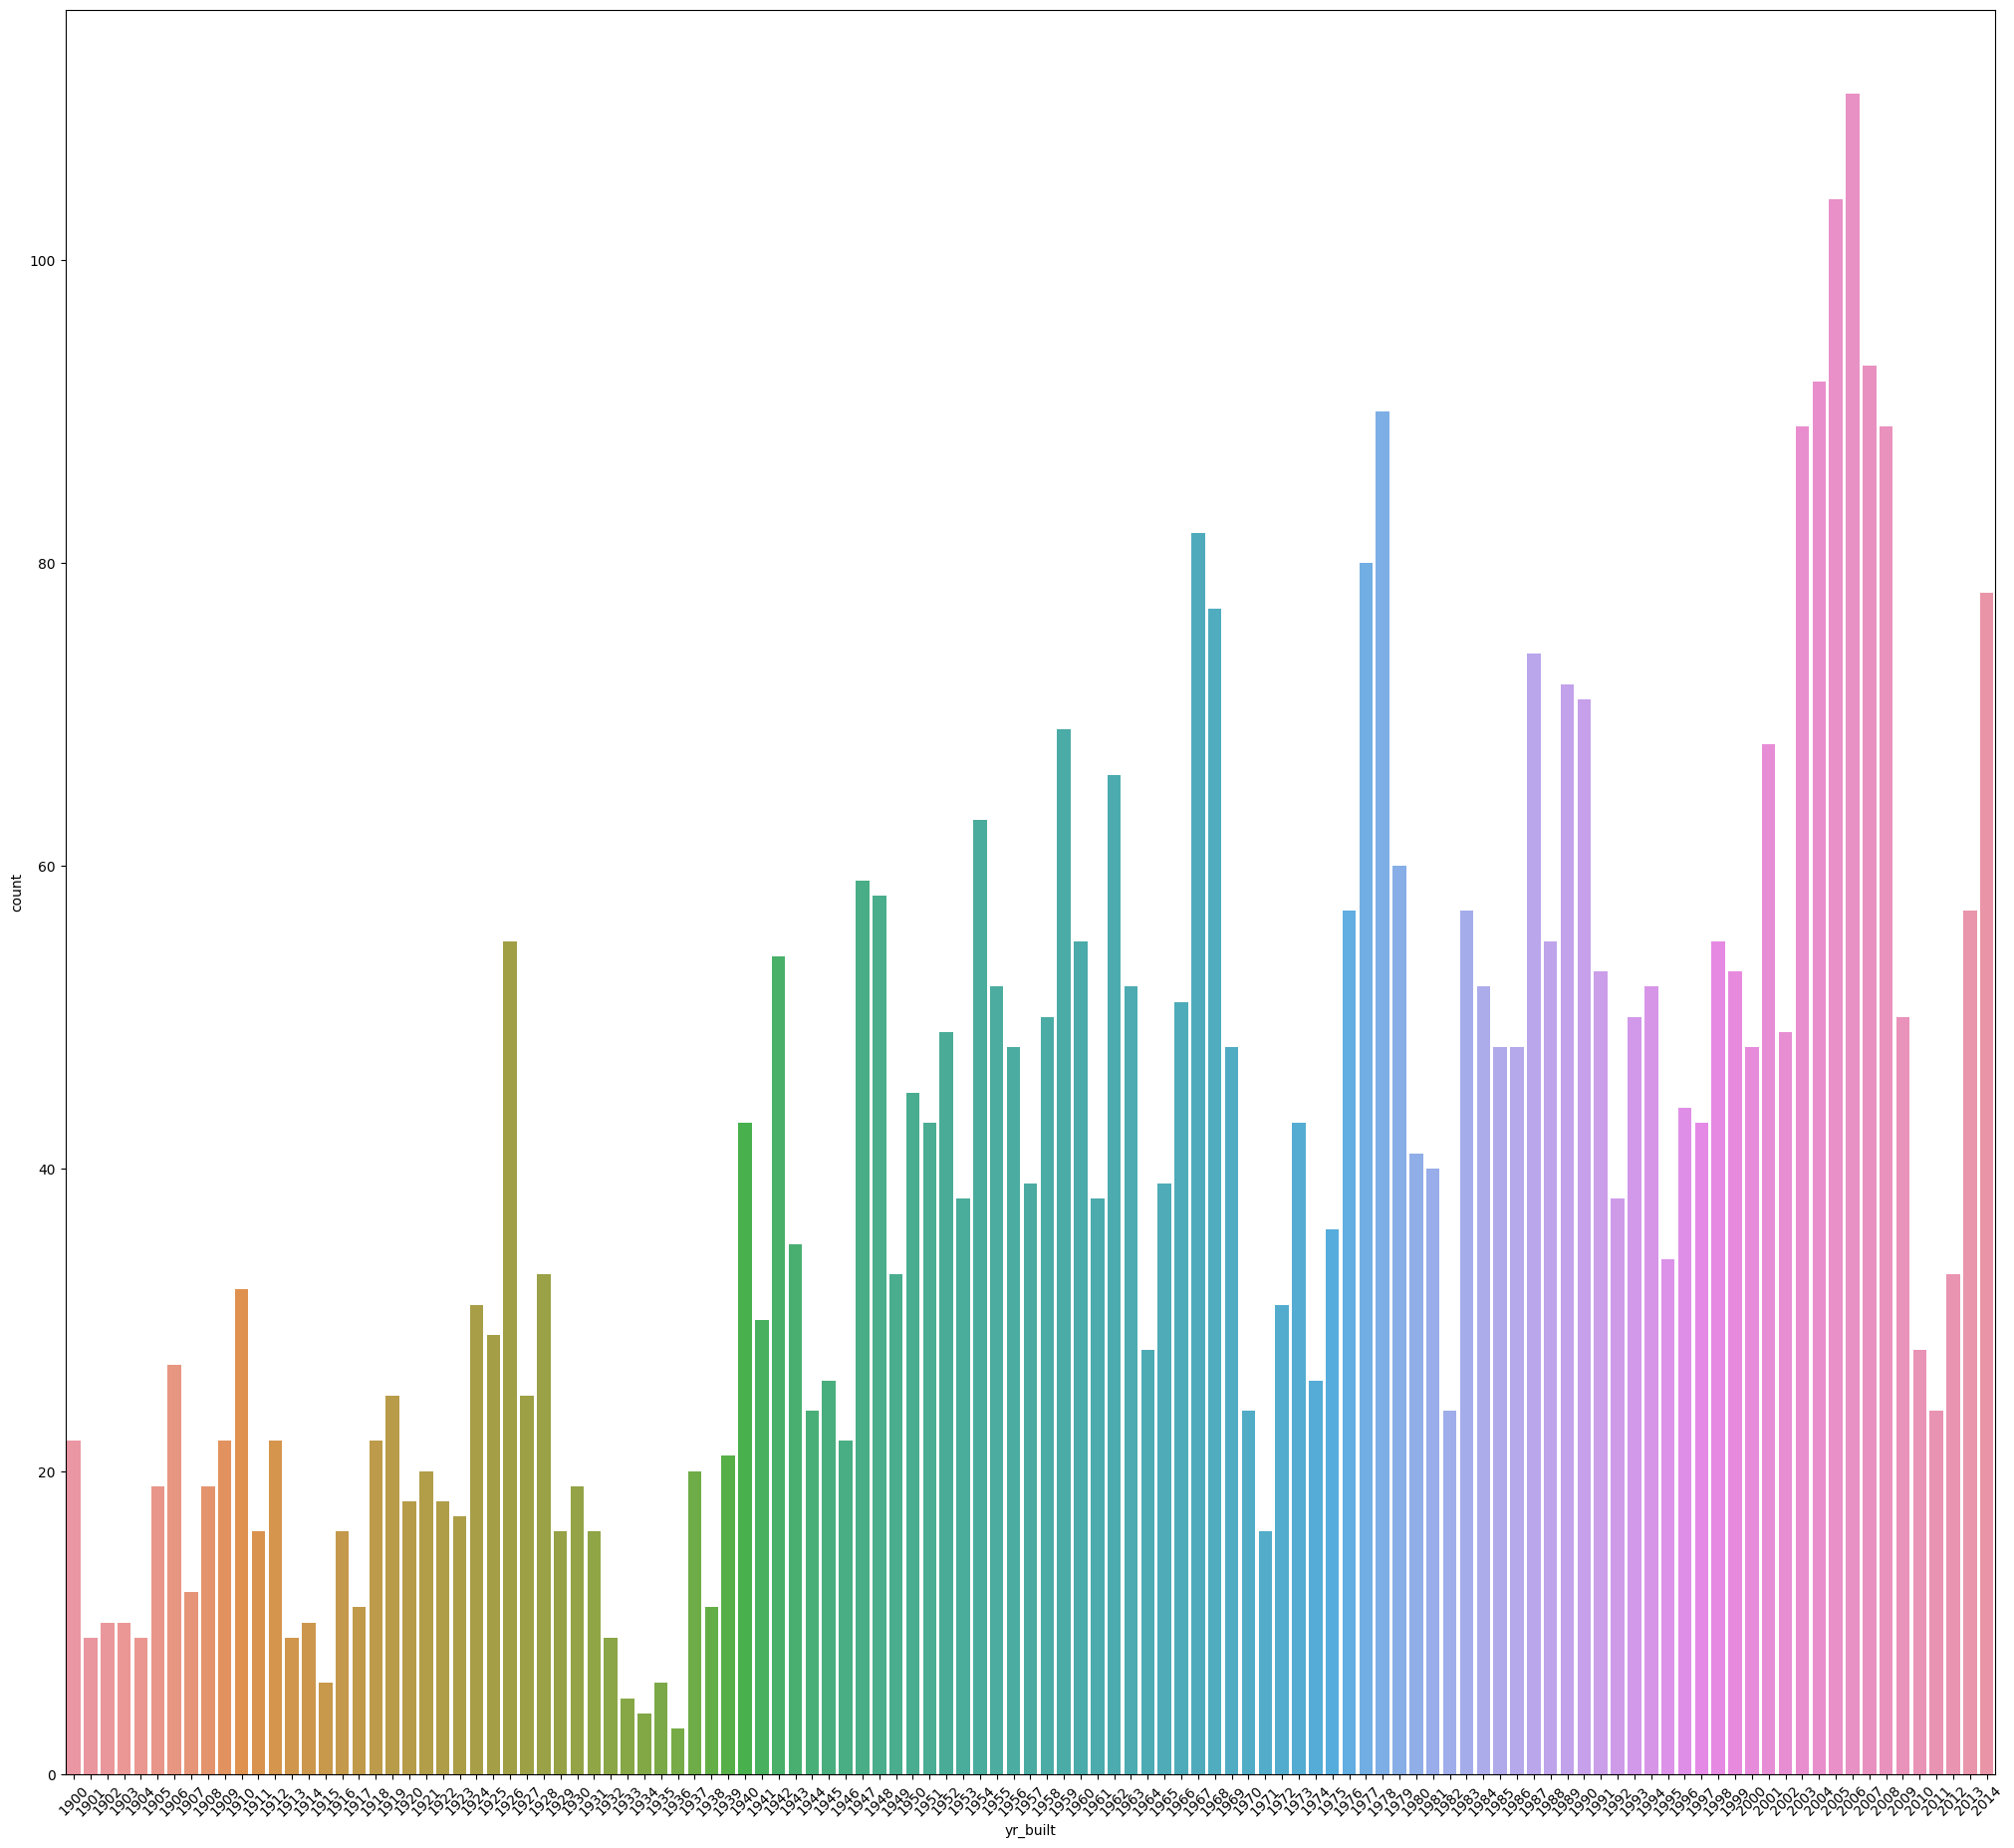

In [15]:
plt.figure(figsize=(25,23))
sns.countplot(x=df['yr_built'],data=df)
plt.xticks(rotation=45)

In [16]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'city', 'statezip'],
      dtype='object')

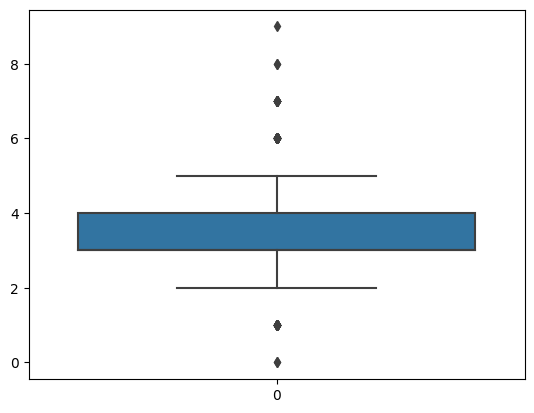

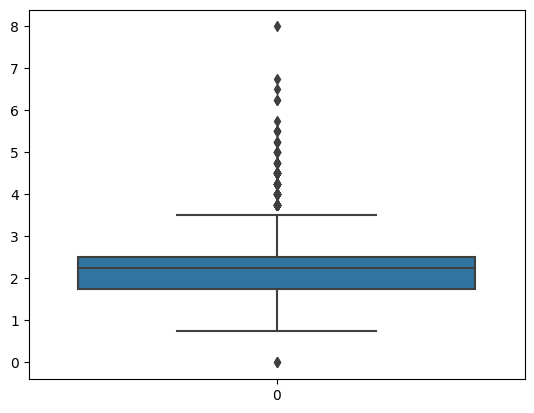

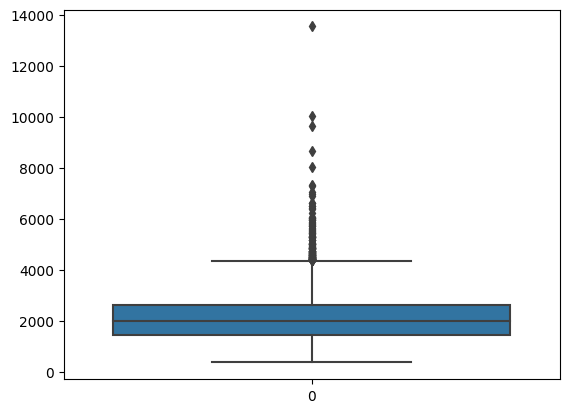

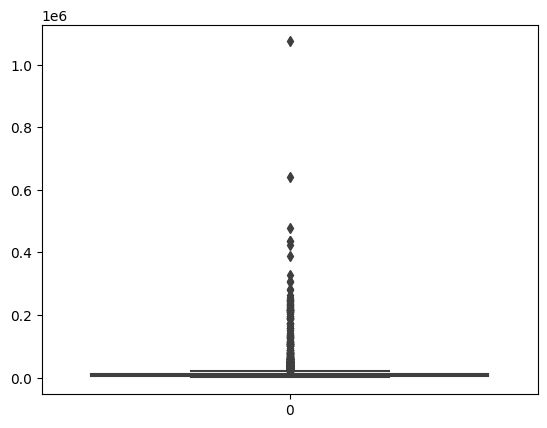

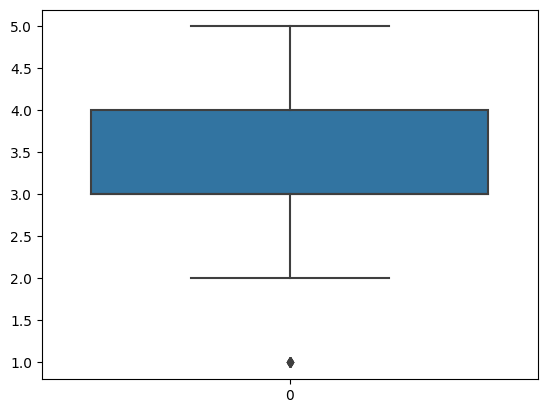

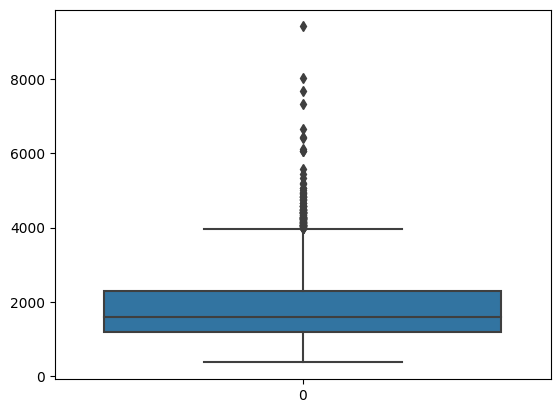

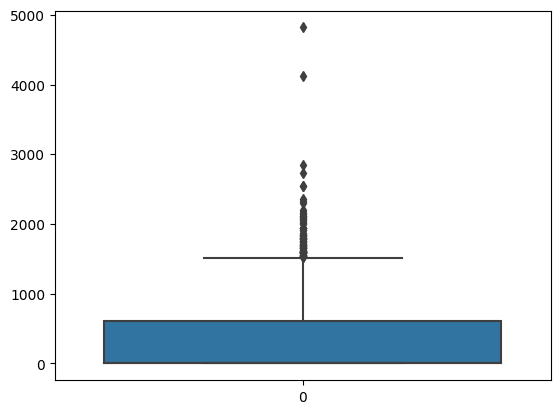

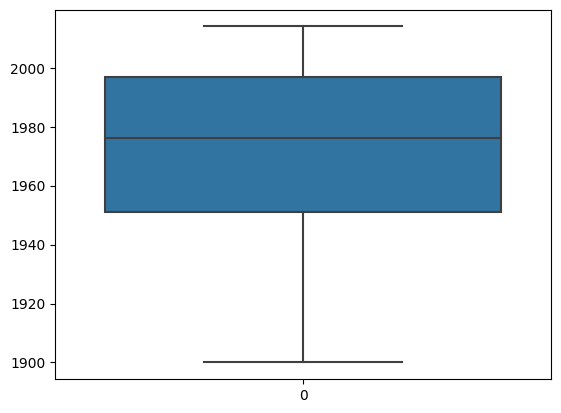

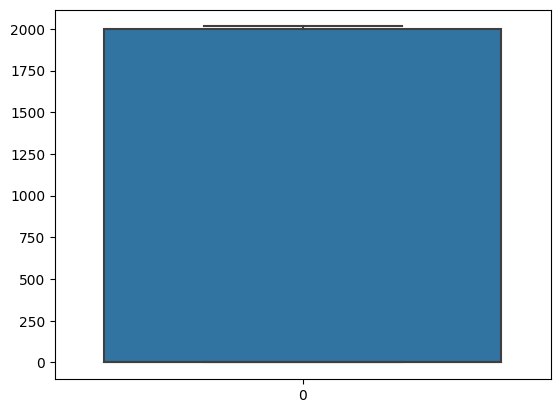

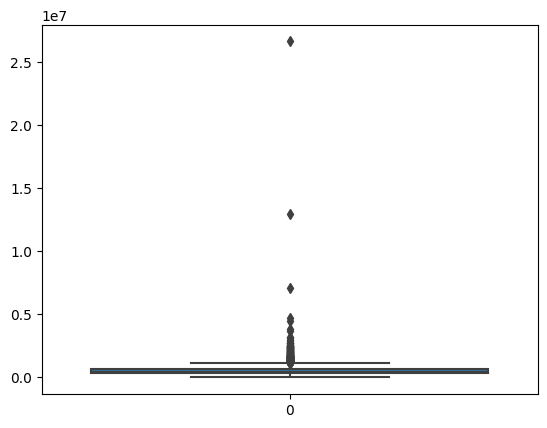

In [17]:
ls=['bedrooms','bathrooms','sqft_living','sqft_lot','condition','sqft_above','sqft_basement','yr_built','yr_renovated','price']
for i in ls:
  sns.boxplot(df[i])
  plt.show()

In [18]:
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    outliers = column[(column < lower_threshold) | (column > upper_threshold)]
    return len(outliers)

# Create a dictionary to store outlier counts for each numerical column
outlier_counts = {}

# Iterate through numerical columns and count outliers
numerical_columns = df.select_dtypes(include=['number']).columns
for column in numerical_columns:
    outlier_counts[column] = count_outliers(df[column])

# Display the counts of outliers for each numerical column
print(outlier_counts)

{'price': 240, 'bedrooms': 118, 'bathrooms': 141, 'sqft_living': 129, 'sqft_lot': 541, 'floors': 0, 'condition': 6, 'sqft_above': 116, 'sqft_basement': 82, 'yr_built': 0, 'yr_renovated': 0}


In [19]:
lst2=['bedrooms','bathrooms','sqft_living','sqft_lot','condition','sqft_above','sqft_basement','price']
for i in lst2:
  def drop_outliers(df,field_name):
    iqr= 1.5*(np.percentile(df[field_name],75)-np.percentile(df[field_name],25))
    df.drop(df[df[field_name]>(iqr + np.percentile(df[field_name],75))].index,inplace=True)
    df.drop(df[df[field_name]<(np.percentile(df[field_name],25)- iqr)].index,inplace=True)
  drop_outliers(df,i)

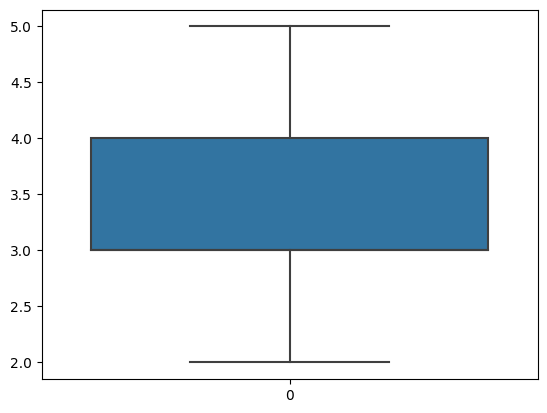

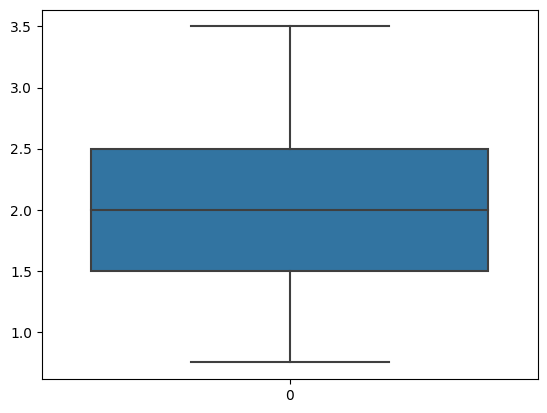

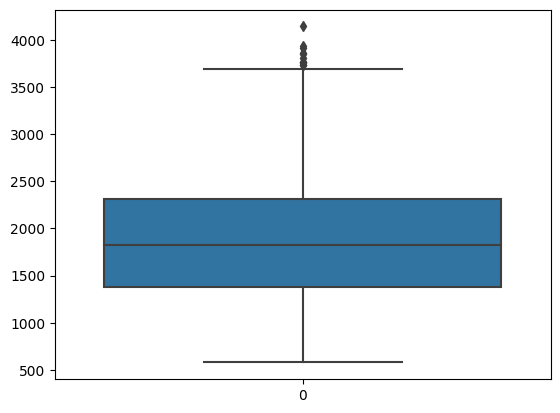

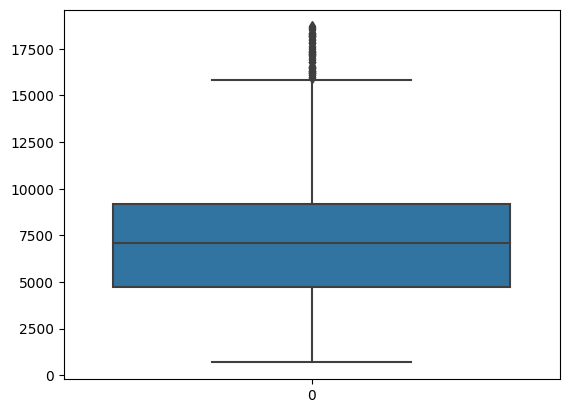

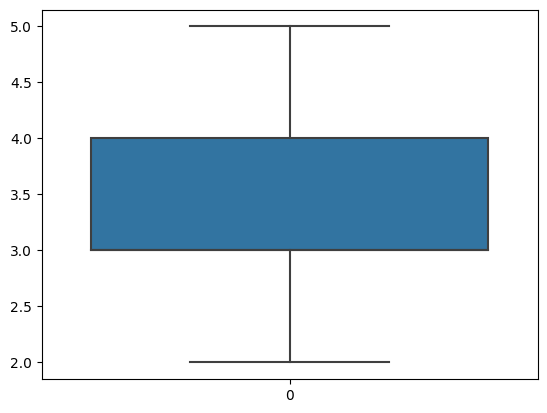

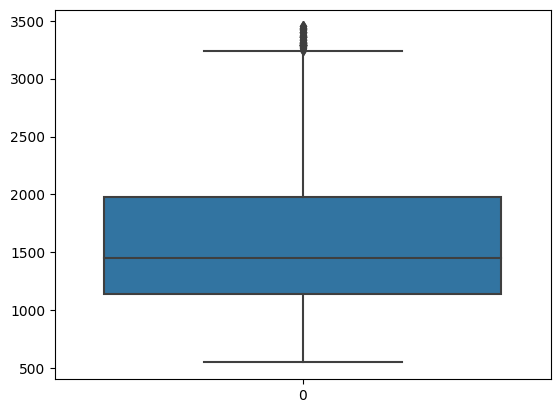

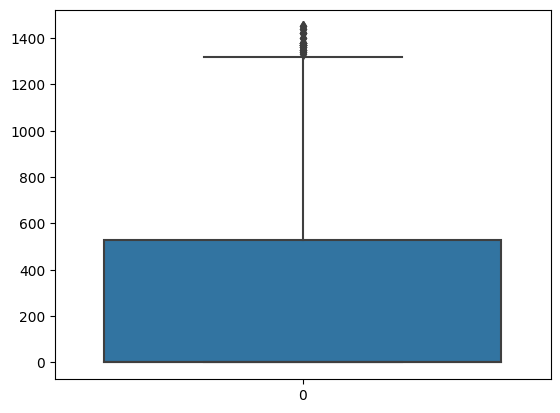

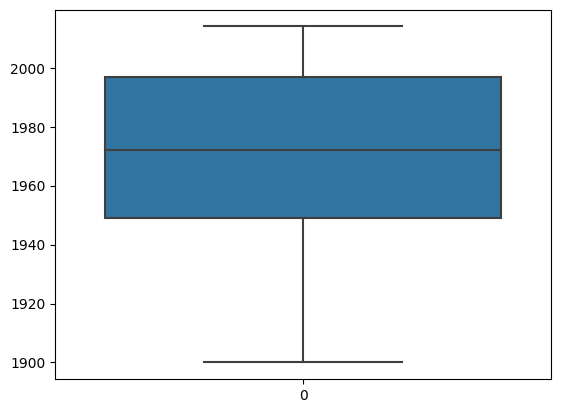

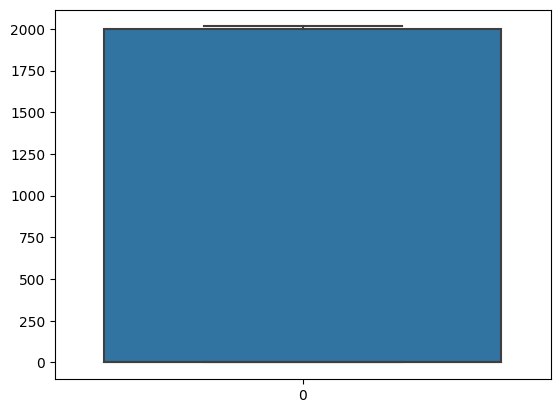

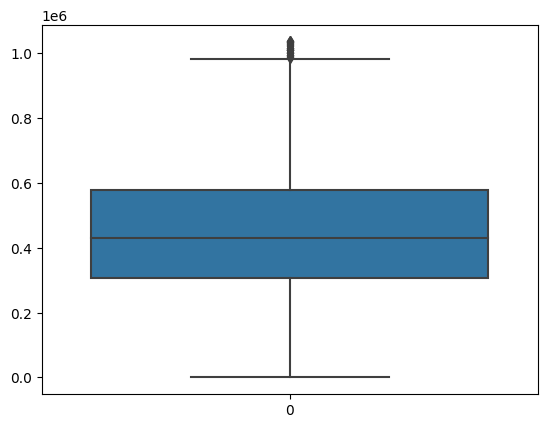

In [20]:
for i in ls:
  sns.boxplot(df[i])
  plt.show()

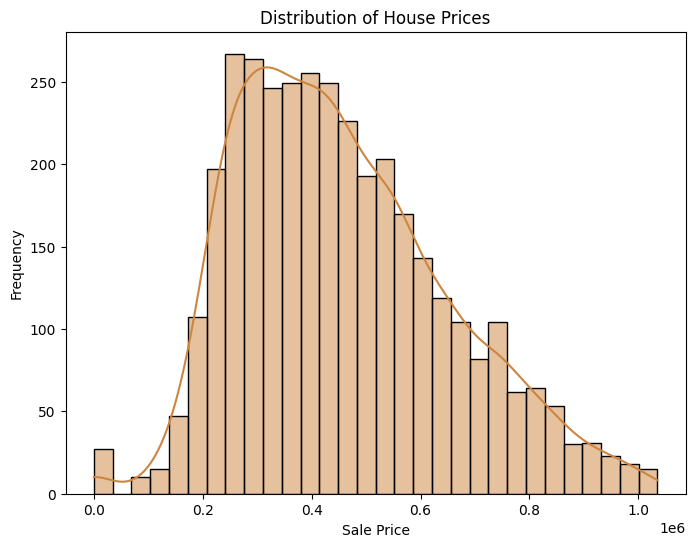

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=30, kde=True,color='peru')
plt.title('Distribution of House Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [22]:
px.scatter(df,x='sqft_living',y='price')

In [23]:
px.scatter(df,x='sqft_lot',y='price')

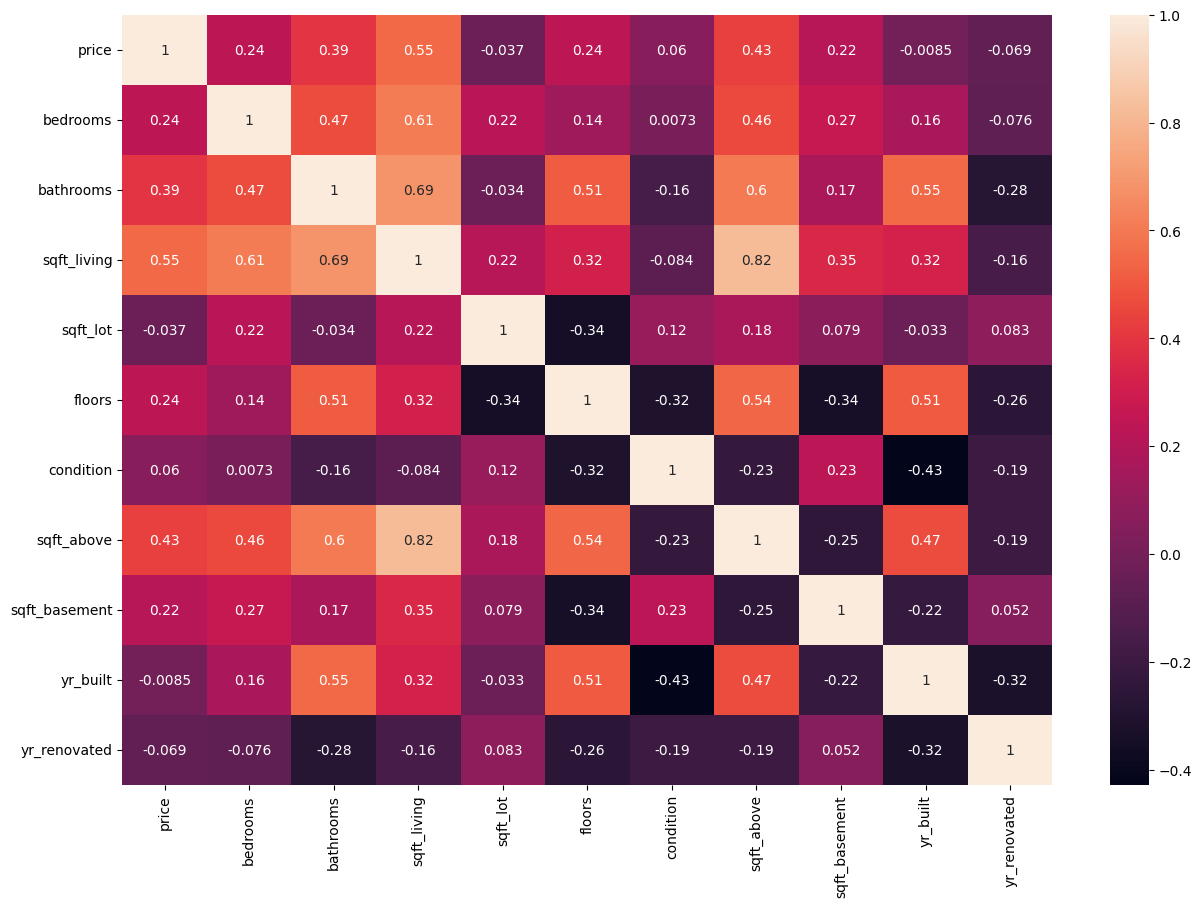

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True);

In [25]:
df['floors'].value_counts()

1.0    1799
2.0    1290
1.5     352
3.0     115
2.5      16
3.5       1
Name: floors, dtype: int64

(-1.0999997692680952,
 1.0999989670267245,
 -1.099999771387875,
 1.099999975922028)

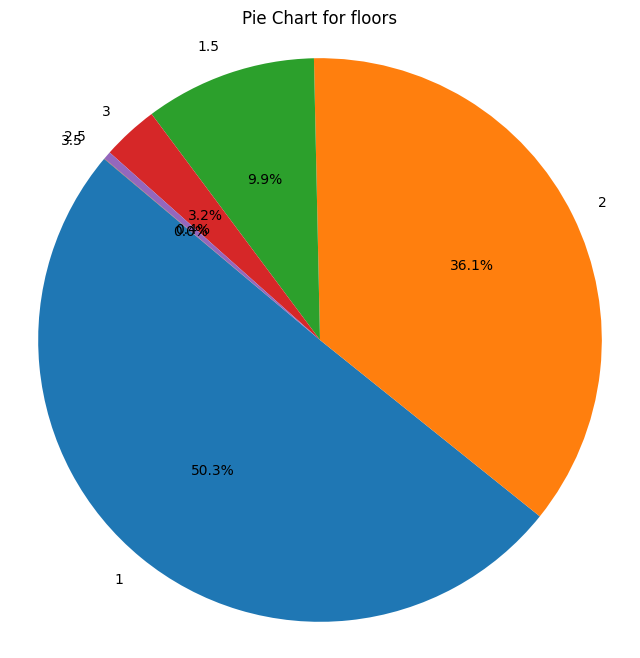

In [26]:
labels = ['1','2','1.5','3','2.5','3.5']
#sizes = [30, 45, 25]  # Values for each category

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(df['floors'].value_counts(),labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart for floors')
plt.axis('equal')

In [27]:
df['city'].value_counts()

Seattle                1364
Renton                  250
Bellevue                187
Redmond                 159
Kirkland                154
Kent                    150
Issaquah                134
Federal Way             130
Auburn                  129
Shoreline               113
Sammamish               110
Maple Valley             84
Burien                   62
Kenmore                  57
Des Moines               52
Snoqualmie               51
Woodinville              44
Mercer Island            40
Covington                35
North Bend               34
Bothell                  32
Duvall                   29
Newcastle                26
Lake Forest Park         26
SeaTac                   24
Tukwila                  24
Enumclaw                 16
Normandy Park            14
Pacific                   6
Vashon                    6
Black Diamond             6
Carnation                 5
Algona                    4
Fall City                 3
Clyde Hill                3
Milton              

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop="first")
city_encoded = encoder.fit_transform(df[["city"]])
df.drop(columns=["city"], inplace=True)
df = pd.concat(
    [df, pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(["city"]))],
    axis=1,
)
df.dropna(inplace=True)

In [29]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340.0,7912.0,1.5,3.0,1340.0,0.0,1955.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342000.0,3.0,2.00,1930.0,11947.0,1.0,4.0,1930.0,0.0,1966.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420000.0,3.0,2.25,2000.0,8030.0,1.0,4.0,1000.0,1000.0,1963.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,550000.0,4.0,2.50,1940.0,10500.0,1.0,4.0,1140.0,800.0,1976.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,490000.0,2.0,1.00,880.0,6380.0,1.0,3.0,880.0,0.0,1938.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df.dtypes

price                       float64
bedrooms                    float64
bathrooms                   float64
sqft_living                 float64
sqft_lot                    float64
floors                      float64
condition                   float64
sqft_above                  float64
sqft_basement               float64
yr_built                    float64
yr_renovated                float64
statezip                     object
city_Auburn                 float64
city_Beaux Arts Village     float64
city_Bellevue               float64
city_Black Diamond          float64
city_Bothell                float64
city_Burien                 float64
city_Carnation              float64
city_Clyde Hill             float64
city_Covington              float64
city_Des Moines             float64
city_Duvall                 float64
city_Enumclaw               float64
city_Fall City              float64
city_Federal Way            float64
city_Inglewood-Finn Hill    float64
city_Issaquah               

In [31]:
df['statezip']=df['statezip'].astype(float)

## Splitting the dataset

In [32]:
y=df.iloc[:,0]
x=df.iloc[:,1:]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

## Model creation

In [34]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
random.fit(x_train,y_train)
y_pred1=random.predict(x_test)

In [35]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
print('r2_score',r2_score(y_test,y_pred1))
print('mape',mean_absolute_percentage_error(y_test,y_pred1))
a1=r2_score(y_test,y_pred1)

r2_score 0.6366865592480251
mape 0.2135061007634768


In [36]:
import xgboost as xgb
xg_reg=xgb.XGBRegressor(n_estimators=100,max_depth=3)
xg_reg.fit(x_train,y_train)
y_pred2=xg_reg.predict(x_test)

In [37]:
print('r2_score',r2_score(y_test,y_pred2))
print('maep',mean_absolute_percentage_error(y_test,y_pred2))
a2=r2_score(y_test,y_pred2)

r2_score 0.752913833148462
maep 0.1698385552177333


In [38]:
from sklearn.linear_model import Ridge
alpha = 1.0  # Regularization strength (adjust as needed)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(x_train, y_train)
y_pred3 = ridge_model.predict(x_test)

In [39]:
print('r2_score',r2_score(y_test,y_pred3))
print('maep',mean_absolute_percentage_error(y_test,y_pred3))
a3=r2_score(y_test,y_pred3)

r2_score 0.4675524365563424
maep 0.28763527993411186


In [40]:
from lightgbm import LGBMRegressor
lgb_model=LGBMRegressor()

In [41]:
lgb_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [42]:
lgb_model =LGBMRegressor(objective='regression', num_leaves=5,
                              learning_rate=0.05, n_estimators=4000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lgb_model.fit(x_train,y_train)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2, colsa

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2, feature_fraction_seed=9, learning_rate=0.05,
              max_bin=55, min_data_in_leaf=6, min_sum_hessian_in_leaf=11,
              n_estimators=4000, num_leaves=5, objective='regression')

In [43]:
y_pred4 = lgb_model.predict(x_test)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [44]:
print('r2 score is',r2_score(y_test,y_pred4))
print('mape is',mean_absolute_percentage_error(y_test,y_pred4))
a4=r2_score(y_test,y_pred4)

r2 score is 0.7282547649513105
mape is 0.17471184291854103


In [45]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [46]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
param_grid = {'n_estimators': [3400],
              'max_features': [13],
              'max_depth': [5],
              'learning_rate': [0.01],
              'subsample': [0.8],
             'random_state' : [5]}
gb_model = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=1, cv=5)
gb_model.fit(x_train, y_train)
y_pred5=gb_model.predict(x_test)

In [48]:
print('r2 score is',r2_score(y_test,y_pred5))
print('mape is',mean_absolute_percentage_error(y_test,y_pred5))
a5=r2_score(y_test,y_pred5)

r2 score is 0.7177114201206978
mape is 0.1876350899940531


## Model accuracy comparison

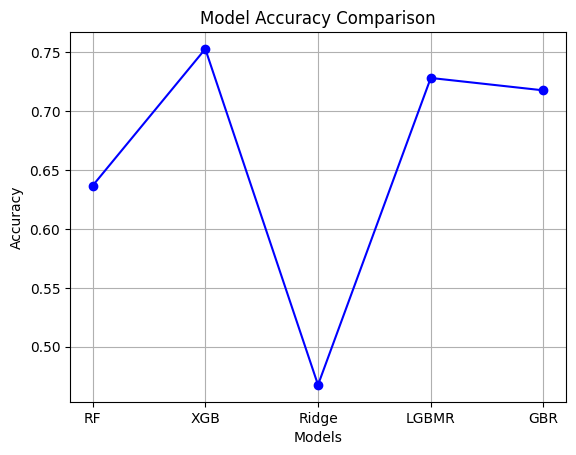

In [49]:
models=['RF','XGB','Ridge','LGBMR','GBR']
accuracy=[a1,a2,a3,a4,a5]
plt.plot(models, accuracy, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()